![](https://www.kaggle.com/static/images/site-logo.png)

# AUTHOR BY: NAJEEB ULLAH 
# DATE: 2024-03-23

 Profile link Github: [Najeeb ullah](https://github.com/najeebjony)


# Decision Tree Classifier

## definasion
- Decision Tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both continuous as well as categorical output variables. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. of the class and its methods:
    - DecisionTreeClassifier: This is the classifier function for DecisionTree. It is the main function for implementing the algorithms. Some important parameters are:
        - criterion: It defines the function that is to be used for splitting. The function measures the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain.
        - splitter: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split.
        - max_features: It defines the no. of features to consider when looking for the best split.
        - max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        - min_samples_split: The minimum number of samples required to split an internal node.
        - min_samples_leaf: The minimum number of samples required to be at a leaf node.
        - max_leaf_nodes: It defines the maximum number of possible leaf nodes.
        - class_weight: Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
        - random_state: The random number seed so that same random numbers are generated every time.
    - fit: This is the main function for fitting the model. It takes the training data and the target variable as arguments.
    - predict: This function is used to predict the class for an input. It takes the test data and returns the class labels.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


# Load The Datset 

In [2]:
# load data set 
df = pd.read_csv('clean_pred.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group,Family,IsAlone
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,18-40,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,41-76,2,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,41-76,1,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,18-40,1,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,18-40,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
 11  age_group    418 non-null    object 
 12  Family       418 non-null    int64  
 13  IsAlone      418 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 45.8+ KB


# No any missing values in our dataet 

In [4]:
# check missing values 
print(df.isnull().sum().sort_values(ascending=False))


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
age_group      0
Family         0
IsAlone        0
dtype: int64


In [5]:
le = LabelEncoder()
for col in df.select_dtypes(include=['category','object']):
        df[col] = le.fit_transform(df[col])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    int32  
 4   Sex          418 non-null    int32  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    int32  
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    int32  
 11  age_group    418 non-null    int32  
 12  Family       418 non-null    int64  
 13  IsAlone      418 non-null    int64  
dtypes: float64(2), int32(5), int64(7)
memory usage: 37.7 KB


In [7]:
# using min max scaler all dataset 
# scaler = MinMaxScaler()
# df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])
# df.head()


In [8]:
X = df.drop(['Survived','Sex'], axis=1)
y = df['Survived']
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group,Family,IsAlone
0,892,0,3,206,1,34.5,0,0,152,7.8292,1,3,1,1
1,893,1,3,403,0,47.0,1,0,221,7.0000,2,4,2,0
2,894,0,2,269,1,62.0,0,0,73,9.6875,1,4,1,1
3,895,0,3,408,1,27.0,0,0,147,8.6625,2,3,1,1
4,896,1,3,178,0,22.0,1,1,138,12.2875,2,3,3,0


# shape of train and test data

In [10]:
# check the shape of train and test data
print("Train set size: ", len(y_train))
print("Test set size: ", len(y_test))

Train set size:  334
Test set size:  84


# call The model 

In [11]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=50, random_state=42)
model.fit(X_train, y_train)
#predict the model 
y_pred = model.predict(X_test)

#evaluate the model 
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[41  9]
 [20 14]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.82      0.74        50
           1       0.61      0.41      0.49        34

    accuracy                           0.65        84
   macro avg       0.64      0.62      0.61        84
weighted avg       0.65      0.65      0.64        84



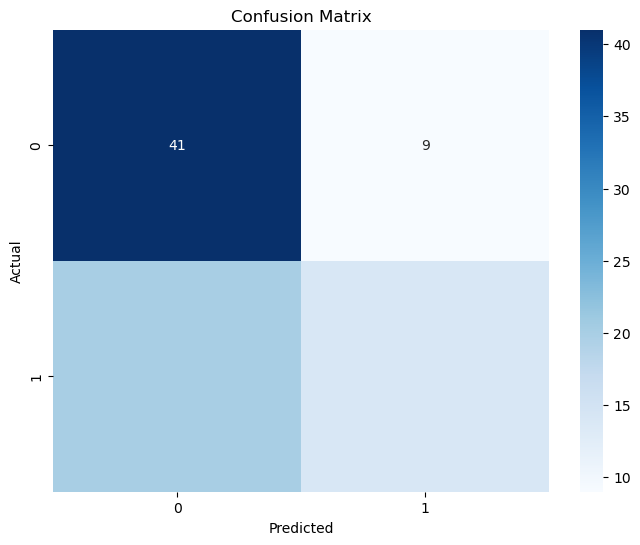

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [13]:
# save the decision tree 
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='./saved_models/decision_tree.dot', feature_names=X.columns, class_names=['Dead', 'Survived'], filled=True, rounded=True, special_characters=True)

In [14]:
# save model from 
import pickle
with open('./saved_models/decision_tree_classifier_model.pkl', 'wb') as f:
    pickle.dump(model, f)